In [1]:
import pandas as pd

In [2]:
df=pd.read_csv("housing.csv")

In [3]:
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


In [4]:
from sklearn.datasets import load_boston

In [6]:
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [7]:
correlation_matrix = df.corr()

In [8]:
import seaborn as sns 

<AxesSubplot:>

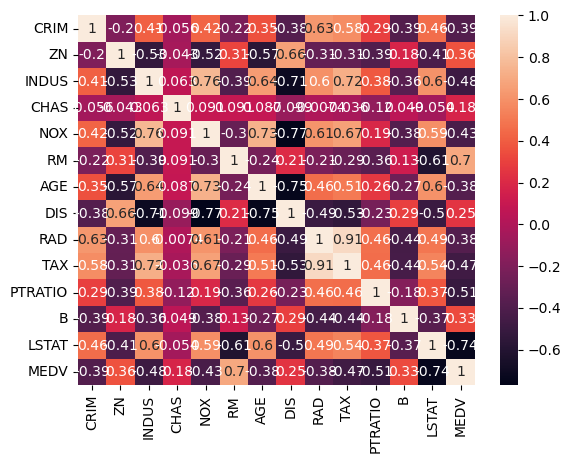

In [9]:
sns.heatmap(data=correlation_matrix, annot=True)

In [10]:
import matplotlib.pyplot as plt

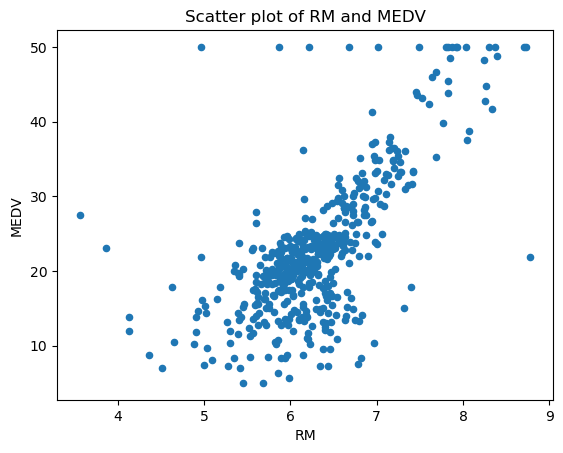

In [11]:
df.plot.scatter(x="RM",y="MEDV")
plt.title("Scatter plot of RM and MEDV")
plt.xlabel("RM")
plt.ylabel("MEDV")
plt.show()

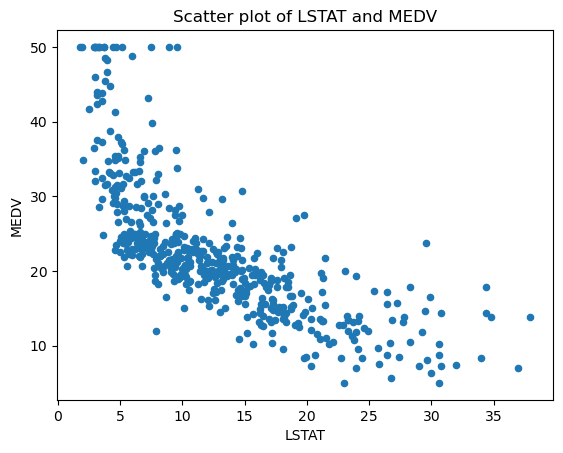

In [12]:
df.plot.scatter(x="LSTAT",y="MEDV")
plt.title("Scatter plot of LSTAT and MEDV")
plt.xlabel("LSTAT")
plt.ylabel("MEDV")
plt.show()

In [13]:


from sklearn.model_selection import train_test_split
import numpy as np

In [14]:
X = pd.DataFrame(np.c_[df['LSTAT'], df['RM']], columns = ['LSTAT','RM'])
Y = df['MEDV']

In [42]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.6, random_state=0)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)


(202, 2)
(304, 2)
(202,)
(304,)


In [43]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
model = LinearRegression()
model.fit(X_train, Y_train)

LinearRegression()

In [44]:
train_prediction=model.predict(X_train)


In [45]:
train_mse=(np.sqrt(mean_squared_error(Y_train,train_prediction)))
train_mse

5.647408746422828

In [46]:
r2_train=r2_score(Y_train,train_prediction)
r2_train

0.6670160511801224

In [47]:
test_prediction=model.predict(X_test)

In [48]:
test_mse=(np.sqrt(mean_squared_error(Y_test,test_prediction)))
test_mse

5.467070670093574

In [49]:
r2_test=r2_score(Y_test,test_prediction)
r2_test

0.6092858002255772

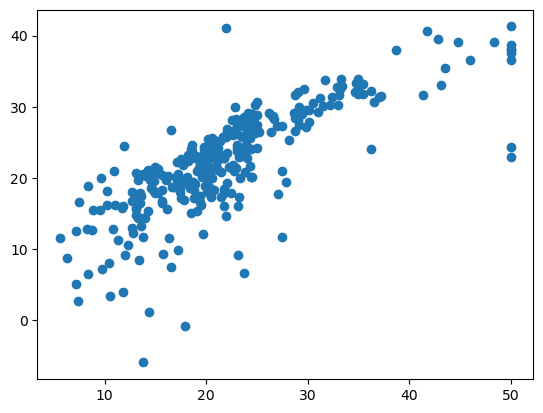

In [50]:
plt.scatter(Y_test,test_prediction)
plt.show()